Load Import


In [443]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score

In [444]:
# Load Dataset

# X_train=pd.read_csv('../../../Fase3_Train_Input.csv').to_numpy()
# y_train=pd.read_csv('../../../Fase3_Train_Targets.csv').to_numpy().flatten()
# X_test=pd.read_csv('../../../Fase3_Test_Input.csv').to_numpy()
# y_test=pd.read_csv('../../../Fase3_Test_Targets.csv').to_numpy().flatten()

X1=pd.read_csv('../../../Fase3_Train_Input.csv')
X2=pd.read_csv('../../../Fase3_Test_Input.csv')
y1=pd.read_csv('../../../Fase3_Train_Targets.csv')
y2=pd.read_csv('../../../Fase3_Test_Targets.csv')
Data=pd.concat([X1, X2]).to_numpy()
Targets=pd.concat([y1, y2]).to_numpy().flatten()

# X1=pd.read_csv('../../../Fase3_Train_Input.csv').to_numpy()
# y1=pd.read_csv('../../../Fase3_Train_Targets.csv').to_numpy().flatten()
# Data=X1
# Targets=y1


In [445]:
from sklearn.model_selection import train_test_split

print(type(Data),type(Targets),sep="----")
print(Data.shape,Targets.shape,sep="----")

X_train, X_test, y_train, y_test = train_test_split(Data, Targets,
                  train_size=0.7, test_size=0.3, stratify=Targets, shuffle=True)
                  # El parámetro stratify asegura la partición balanceada

print("X_train shape: {}".format(X_train.shape))  
print("y_test :", y_train)

# X es una matriz, y es un vector
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

<class 'numpy.ndarray'>----<class 'numpy.ndarray'>
(450, 3)----(450,)
X_train shape: (315, 3)
y_test : ['medicamento3' 'medicamento1' 'medicamento3' 'medicamento1'
 'medicamento3' 'medicamento3' 'medicamento1' 'medicamento3'
 'medicamento1' 'medicamento2' 'medicamento3' 'medicamento2'
 'medicamento3' 'medicamento2' 'medicamento2' 'medicamento1'
 'medicamento1' 'medicamento1' 'medicamento3' 'medicamento1'
 'medicamento2' 'medicamento1' 'medicamento1' 'medicamento2'
 'medicamento2' 'medicamento3' 'medicamento2' 'medicamento1'
 'medicamento2' 'medicamento1' 'medicamento2' 'medicamento3'
 'medicamento1' 'medicamento1' 'medicamento1' 'medicamento2'
 'medicamento3' 'medicamento1' 'medicamento1' 'medicamento1'
 'medicamento2' 'medicamento2' 'medicamento1' 'medicamento1'
 'medicamento3' 'medicamento2' 'medicamento3' 'medicamento1'
 'medicamento2' 'medicamento2' 'medicamento3' 'medicamento1'
 'medicamento2' 'medicamento2' 'medicamento3' 'medicamento1'
 'medicamento2' 'medicamento3' 'medicamento

Building the KNN Classifier

In [446]:
from sklearn.neighbors import KNeighborsClassifier

knnmod = KNeighborsClassifier(n_neighbors=4,algorithm='kd_tree')

knnmod.fit(X_train, y_train)


#Predicting the model on training and test sets.
y_train_pred_kn = knnmod.predict(X_train)
y_test_pred_kn = knnmod.predict(X_test)

#Performance of the model with the accuracy score function

from sklearn.metrics import accuracy_score
knnmod_train = accuracy_score(y_train, y_train_pred_kn)
knnmod_test = accuracy_score(y_test, y_test_pred_kn)
print(f1_score(y_train, y_train_pred_kn, average='micro'))
print(f1_score(y_test, y_test_pred_kn, average='micro'))

print(f"KNN train / test accuracies: {knnmod_train: .3f} / {knnmod_test: .3f}")


0.9873015873015873
0.9555555555555556
KNN train / test accuracies:  0.987 /  0.956


Confusion Matrix 

Test Data Set : KNN Classifier

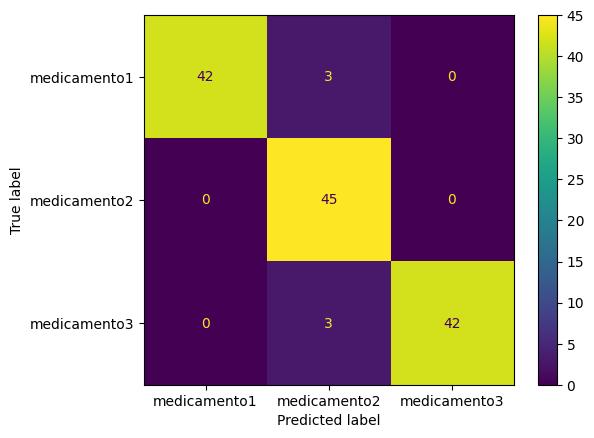

Text(0.5, 1.0, 'Confusion Matrix:  Test - KNN')

In [447]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred_kn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=np.array(['medicamento1','medicamento2','medicamento3']).flatten())
disp.plot()
plt.show()
disp.ax_.set_title('Confusion Matrix:  Test - KNN')

---
Building the Bagging Model

In [448]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(estimator=knnmod, n_jobs=-1, n_estimators=6) 

print(bag.get_params(deep=True))

bag = bag.fit(X_train, y_train)


#Predicting the model on training and test sets.

y_train_pred_bg = bag.predict(X_train)
y_test_pred_bg = bag.predict(X_test)

#Performance of the model with the accuracy score function

bag_train = accuracy_score(y_train, y_train_pred_bg)
bag_test = accuracy_score(y_test, y_test_pred_bg)
print(f"Bagging train/test accuracies: {bag_train: .3f}/{bag_test: .3f}")




{'base_estimator': 'deprecated', 'bootstrap': True, 'bootstrap_features': False, 'estimator__algorithm': 'kd_tree', 'estimator__leaf_size': 30, 'estimator__metric': 'minkowski', 'estimator__metric_params': None, 'estimator__n_jobs': None, 'estimator__n_neighbors': 4, 'estimator__p': 2, 'estimator__weights': 'uniform', 'estimator': KNeighborsClassifier(algorithm='kd_tree', n_neighbors=4), 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 6, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Bagging train/test accuracies:  0.990/ 0.963


Confusion Matrix 

Test Data Set : Bagging

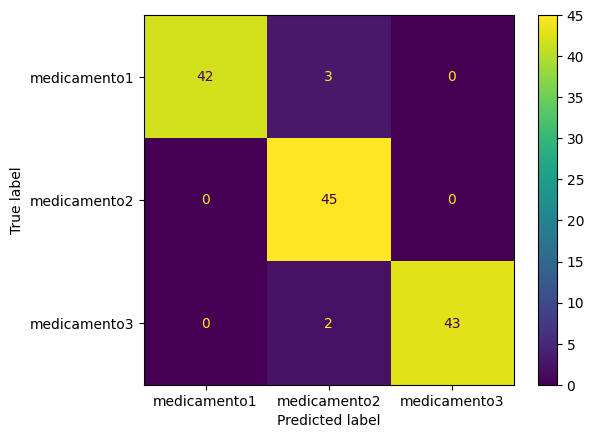

Text(0.5, 1.0, 'Confusion Matrix:  Test - Bagging')

In [449]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred_bg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=np.array(['medicamento1','medicamento2','medicamento3']).flatten())
disp.plot()
plt.show()
disp.ax_.set_title('Confusion Matrix:  Test - Bagging')

In [450]:
from sklearn.svm import SVC

supvm = SVC(kernel='poly', C = 1.0)
supvm.fit(X_train, y_train)
# SVC(random_state=0)

#Predicting the model on training and test sets.

y_train_pred_sv = supvm.predict(X_train)
y_test_pred_sv = supvm.predict(X_test)

#Performance of the model with the accuracy score function

from sklearn.metrics import accuracy_score
supvm_train = accuracy_score(y_train, y_train_pred_sv)
supvm_test = accuracy_score(y_test, y_test_pred_sv)
print(f1_score(y_train, y_train_pred_sv, average='micro'))
print(f1_score(y_test, y_test_pred_sv, average='micro'))
print(f"Decision SVM train / test accuracies: {supvm_train: .3f} / {supvm_test: .3f}")

0.9873015873015873
0.9555555555555556
Decision SVM train / test accuracies:  0.987 /  0.956


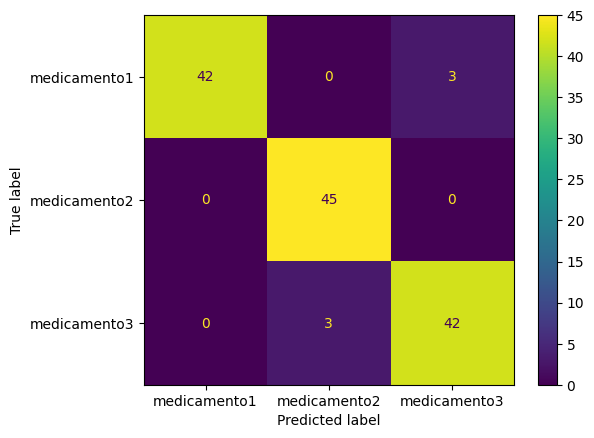

Text(0.5, 1.0, 'Confusion Matrix:  Test - SVM')

In [451]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred_sv)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=np.array(['medicamento1','medicamento2','medicamento3']).flatten())
disp.plot()
plt.show()
disp.ax_.set_title('Confusion Matrix:  Test - SVM')

In [452]:
bag = BaggingClassifier(estimator=supvm ,n_estimators=6)
print(bag.get_params(deep=True))


# print(bag.decision_function(X_train).shape)

bag = bag.fit(X_train, y_train)
# print(bag.decision_function(X_train).shape)

#Predicting the model on training and test sets.

y_train_pred_bg = bag.predict(X_train)
y_test_pred_bg = bag.predict(X_test)

#Performance of the model with the accuracy score function

bag_train = accuracy_score(y_train, y_train_pred_bg)
bag_test = accuracy_score(y_test, y_test_pred_bg)
print(f"Bagging train/test accuracies: {bag_train: .3f}/{bag_test: .3f}")

{'base_estimator': 'deprecated', 'bootstrap': True, 'bootstrap_features': False, 'estimator__C': 1.0, 'estimator__break_ties': False, 'estimator__cache_size': 200, 'estimator__class_weight': None, 'estimator__coef0': 0.0, 'estimator__decision_function_shape': 'ovr', 'estimator__degree': 3, 'estimator__gamma': 'scale', 'estimator__kernel': 'poly', 'estimator__max_iter': -1, 'estimator__probability': False, 'estimator__random_state': None, 'estimator__shrinking': True, 'estimator__tol': 0.001, 'estimator__verbose': False, 'estimator': SVC(kernel='poly'), 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 6, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Bagging train/test accuracies:  0.987/ 0.956


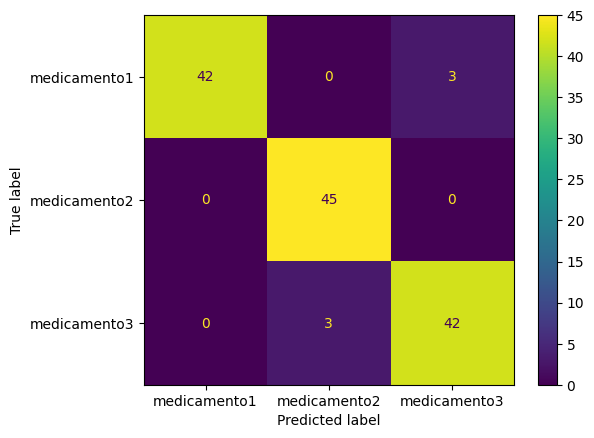

Text(0.5, 1.0, 'Confusion Matrix:  Test - Bagging')

In [453]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred_bg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=np.array(['medicamento1','medicamento2','medicamento3']).flatten())
disp.plot()
plt.show()
disp.ax_.set_title('Confusion Matrix:  Test - Bagging')